In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Concentration')

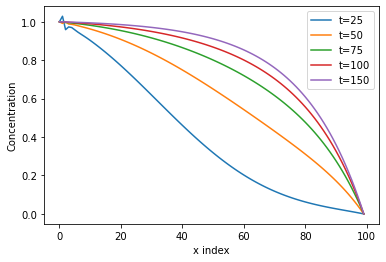

In [11]:
#Crank-Nicolson solution of Adv-Disp eqn using constant downstream concentration 
from scipy.linalg import solve_banded
#Define size of domain
ntimes = 200
endtime = 2.
dt = endtime/(ntimes - 1)
nx = 100
xmax = 1.
dx = xmax/(nx-1)
Pe = 5
C_upstream = 1.
C_downstream = 0.
#Create concentration array and set boundaries
C = zeros([ntimes,nx])
C[:,0] = C_upstream
C[:,-1] = C_downstream
A_upper = (1./(4.*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_lower = (-1./(4.*dx) - 1./(2.*Pe*dx**2))*ones(nx-2)
A_mid = (1./dt + 1./(Pe*dx**2))*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
A = vstack((A_upper, A_mid, A_lower))
for n in arange(ntimes-1):
    b = C[n,0:-2]*(1./(4.*dx) + 1./(2.*Pe*dx**2))  \
        + C[n,1:-1]*(1./dt - 1./(Pe*dx**2))  \
        + C[n,2:]*(-1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += -C[n+1,0]*A_lower[1]
    b[-1] += -C[n+1,-1]*A_upper[1]
    C[n+1,1:-1] = solve_banded((1,1),A,b) 


plot(C[25,:])
plot(C[50,:])
plot(C[75,:])
plot(C[100,:])
plot(C[150,:])
legend(['t=25','t=50','t=75','t=100','t=150'])
xlabel('x index')
ylabel('Concentration')

Text(0, 0.5, 'Concentration')

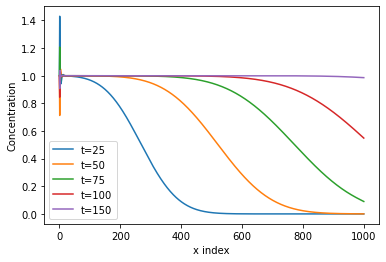

In [12]:
#Crank-Nicolson solution of Adv-Disp eqn using zero diffusion downstream bnd condition
from scipy.linalg import solve_banded
#Define size of domain
ntimes = 200
endtime = 2.
dt = endtime/(ntimes - 1)
nx = 1000
xmax = 1.
dx = xmax/(nx-1)
Pe = 50
C_upstream = 1.
C_downstream = 0.
#Create concentration array and set boundaries
C = zeros([ntimes,nx])
C[:,0] = C_upstream
#C[:,-1] = C_downstream
A_upper = (1./(4.*dx) - 1./(2.*Pe*dx**2))*ones(nx-1)
A_lower = (-1./(4.*dx) - 1./(2.*Pe*dx**2))*ones(nx-1)
A_mid = (1./dt + 1./(Pe*dx**2))*ones(nx-1)
A_upper[0] = 0.
A_lower[-1] = 0.
#Modified for zero diffusion bnd
A_mid[-1] = (1./dt + 1./(2.*dx))
A_lower[-2] = -1./(2.*dx)
A = vstack((A_upper, A_mid, A_lower))
b = zeros(nx-1)
for n in arange(ntimes-1):
    b[0:-1] = C[n,0:-2]*(1./(4.*dx) + 1./(2.*Pe*dx**2))  \
        + C[n,1:-1]*(1./dt - 1./(Pe*dx**2))  \
        + C[n,2:]*(-1./(4.*dx) + 1./(2.*Pe*dx**2))
    b[0] += -C[n+1,0]*A_lower[1]
    #Modified for zero diffusion bnd
    b[-1] = C[n,-1]*(1./dt - 1./(2.*dx)) + C[n,-2]*(1./(2.*dx)) #-C[n+1,-1]*A_upper[1]
    C[n+1,1:] = solve_banded((1,1),A,b) 


plot(C[25,:])
plot(C[50,:])
plot(C[75,:])
plot(C[100,:])
plot(C[150,:])
legend(['t=25','t=50','t=75','t=100','t=150'])
xlabel('x index')
ylabel('Concentration')